In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
import contractions
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
df = pd.read_csv("/home/deeptanshu/Documents/Samsung_prism/filtered_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19297019 entries, 0 to 19297018
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   review  object
 1   rating  int64 
dtypes: int64(1), object(1)
memory usage: 294.4+ MB


In [5]:
df.head()

,review,rating
0,It's really a fun game,5
1,uninstalling. it was ok but felt like it was c...,2
2,Love this game,4
3,Doesn't update play time. Just downloaded it 3...,1
4,app crashes every time I try to log in. what g...,1


In [6]:
df["review"] = df["review"].apply(lambda x: re.sub(r'\.', '', str(x)))

In [7]:
def text_lowercase(text):
    return text.lower()

In [8]:
df['review'] = df['review'].apply(text_lowercase)

In [9]:
df.head(3)

,review,rating
0,it's really a fun game,5
1,uninstalling it was ok but felt like it was co...,2
2,love this game,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19297019 entries, 0 to 19297018
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   review  object
 1   rating  int64 
dtypes: int64(1), object(1)
memory usage: 294.4+ MB


In [11]:

df_reduced = df.sample(n=300000, random_state=42)


In [12]:
def expand_contractions(text):
    words = text.split()
    expanded_words = []
    for word in words:
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [14]:
df_reduced['review'] = df['review'].apply(expand_contractions)

In [14]:
df.head(3)

,review,rating
0,it is really a fun game,5
1,uninstalling it was ok but felt like it was co...,2
2,love this game,4


In [15]:
text_1 = df["review"][0]

In [16]:
text_1

'it is really a fun game'

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/deeptanshu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
def tokenizer(text):
    return word_tokenize(text)

In [19]:
tokenizer(text_1)

['it', 'is', 'really', 'a', 'fun', 'game']

In [21]:
df['review'] = df['review'].apply(tokenizer)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19297019 entries, 0 to 19297018
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   review  object
 1   rating  int64 
dtypes: int64(1), object(1)
memory usage: 294.4+ MB


In [22]:
df.head()

,review,rating
0,it is really a fun game,5
1,uninstalling it was ok but felt like it was co...,2
2,love this game,4
3,does not update play time just downloaded it 3...,1
4,app crashes every time i try to log in what gives,1


In [2]:
df["rating"].unique()

NameError: name 'df' is not defined

/tmp/ipykernel_7706/801360773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


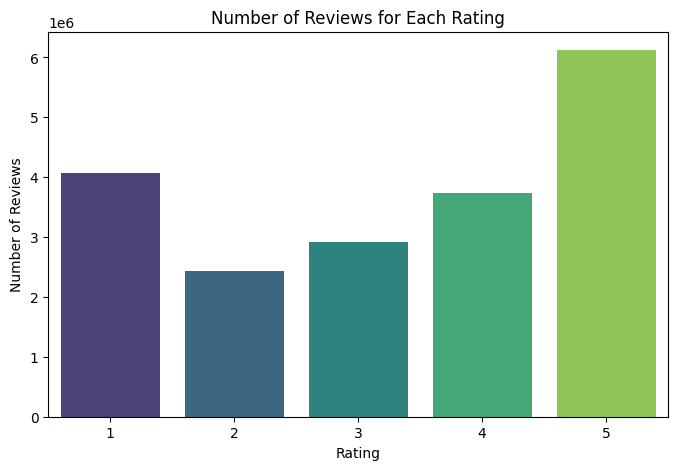

In [26]:
if 'rating' in df.columns:
    rating_counts = df['rating'].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Number of Reviews for Each Rating')
    plt.xlabel('Rating')
    plt.ylabel('Number of Reviews')
    plt.show()



In [1]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

NameError: name 'TfidfVectorizer' is not defined